In [1]:
%pylab inline

/home/gjones/miniconda2/envs/readout/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [14]:
import seaborn as sns
sns.set_context('poster')
rcParams['font.size']=18

In [3]:
from kid_readout import *

In [4]:
ncf = NCFile('/data/readout/2016-04-28_145106_dark_28_dB_dac.nc')

In [7]:
ssa = measurement.basic.SweepStreamArray(ncf.SweepArray0,ncf.StreamArray1)

In [8]:
df = ssa.to_dataframe()

In [10]:
dd = df[df.res_f_0<200e6]

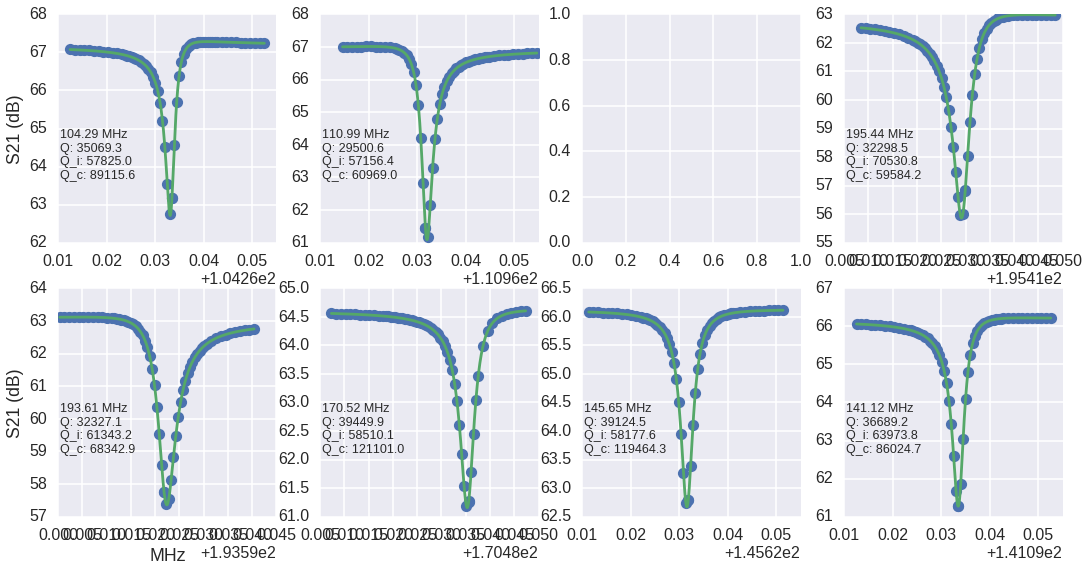

In [15]:
fig,axs = subplots(2,4,figsize=(18,9))
for k,row in dd.iterrows():
    ax = axs.flatten()[k]
    ax.plot(row.res_frequency_data/1e6,20*np.log10(np.abs(row.res_s21_data)),'o')
    ax.plot(row.res_model_frequency/1e6,20*np.log10(np.abs(row.res_model_s21)))
    txt = "%.2f MHz\nQ: %.1f\nQ_i: %.1f\nQ_c: %.1f" % (row.res_f_0/1e6,row.res_Q,row.res_Q_i,1/np.real(1/row.res_Q_e))
    ax.text(0.01,0.5,txt, ha='left',va='top',size='x-small',transform=ax.transAxes)
axs[0,0].set_ylabel('S21 (dB)')
axs[1,0].set_ylabel('S21 (dB)')
axs[1,0].set_xlabel('MHz')


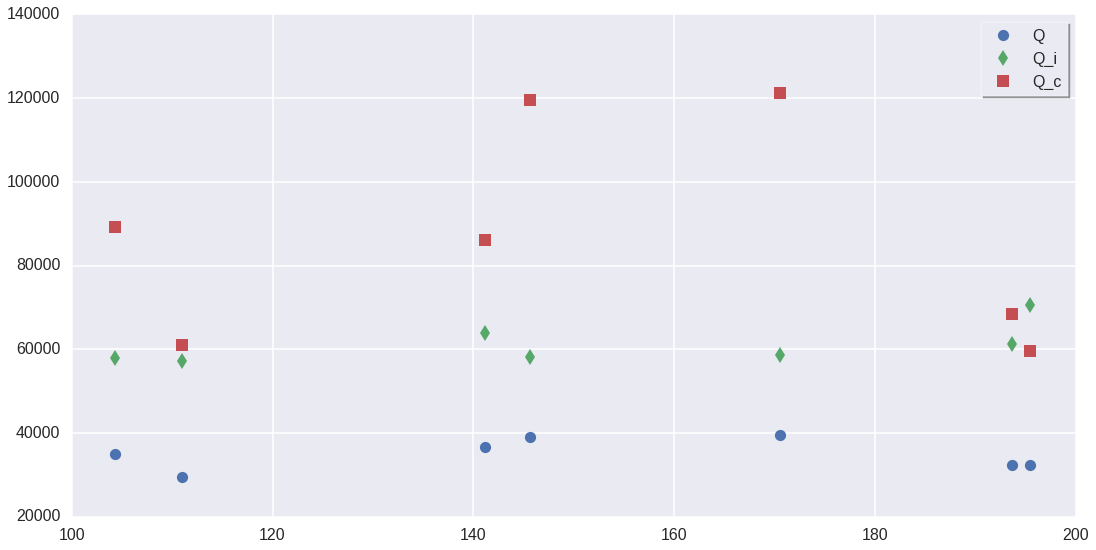

In [16]:
fig,ax = subplots(figsize=(18,9))
ax.plot(dd.res_f_0/1e6,dd.res_Q,'o',label='Q')
ax.plot(dd.res_f_0/1e6,dd.res_Q_i,'d',label='Q_i')
ax.plot(dd.res_f_0/1e6,1/np.real(1/dd.res_Q_e),'s',label='Q_c')
legend(loc='upper right',frameon=True,shadow=True)

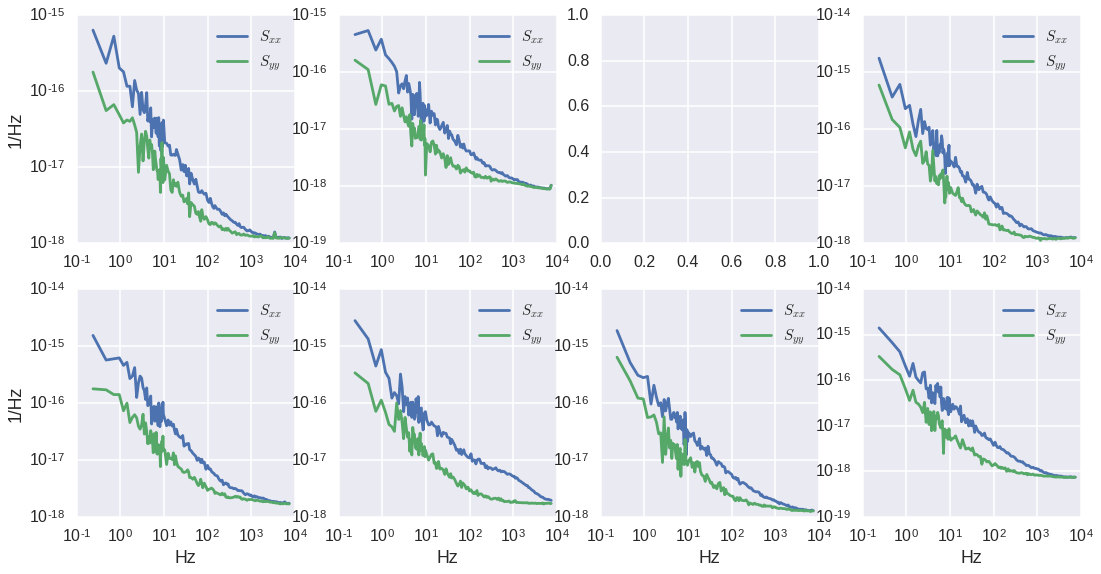

In [17]:
fig,axs = subplots(2,4,figsize=(18,9))
for k,row in dd.iterrows():
    ax = axs.flatten()[k]
    ax.loglog(row.S_frequency[1:],row.S_xx[1:],label='$S_{xx}$')
    ax.loglog(row.S_frequency[1:],row.S_yy[1:],label='$S_{yy}$')
    ax.legend(loc='upper right',prop=dict(size='small'))
for r in [0,1]:
    axs[r,0].set_ylabel('1/Hz')
for c in range(4):
    axs[1,c].set_xlabel('Hz')